In [438]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [439]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math 

# Preprocessing and Data analysis

In [440]:
main_df = pd.read_excel('/content/drive/MyDrive/Course Recommendation System(1-162).xlsx')

In [441]:
main_df.head()

,ID,Start time,Completion time,Email,Name,Name(not mandatory)\n,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,6,2023-01-30 14:04:19,2023-01-30 14:05:54,anonymous,NaN,NaN,0.30,0.85,0.85,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,7,2023-01-30 14:04:44,2023-01-30 14:12:35,anonymous,NaN,Rahul Jain,0.70,0.80,0.20,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,8,2023-01-30 14:11:07,2023-01-30 14:12:47,anonymous,NaN,NaN,0.70,0.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,9,2023-01-30 19:10:54,2023-01-30 19:12:35,anonymous,NaN,Adrij Sharma,0.65,0.70,0.20,0.75,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,10,2023-01-30 22:58:02,2023-01-30 23:00:34,anonymous,NaN,NaN,0.70,0.60,0.20,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
main_df.drop(columns=['ID', 'Start time', 'Completion time', 'Email', 'Name', 'Name(not mandatory)\n'], inplace=True)
main_df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,NaN,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [443]:
mean_val=main_df.mean(axis=1,skipna=True,numeric_only=True)
all_mean=np.mean(mean_val)

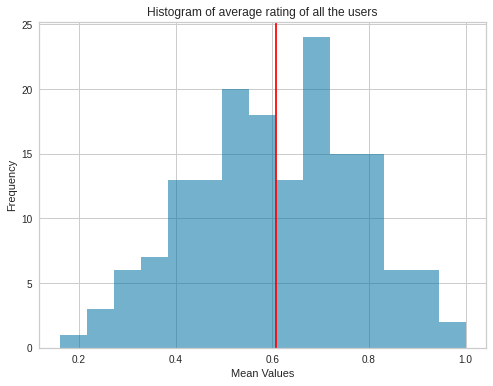

In [444]:
fig = plt.figure(figsize=(8, 6))
plt.hist(mean_val,bins=15,alpha=0.55)
plt.axvline(x=all_mean, color='red')
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of average rating of all the users')
plt.show()

In [445]:
mean_val=main_df.mean(axis=1)
mean_val
std_val=main_df.std(axis=1)
cnt=0
for index,row in main_df.iterrows():
  for col in main_df.columns:
    if(row[col] >=0 or row[col]<=1):
      cnt+=1
    else:
      main_df[col].at[index]=mean_val[index].round(2)

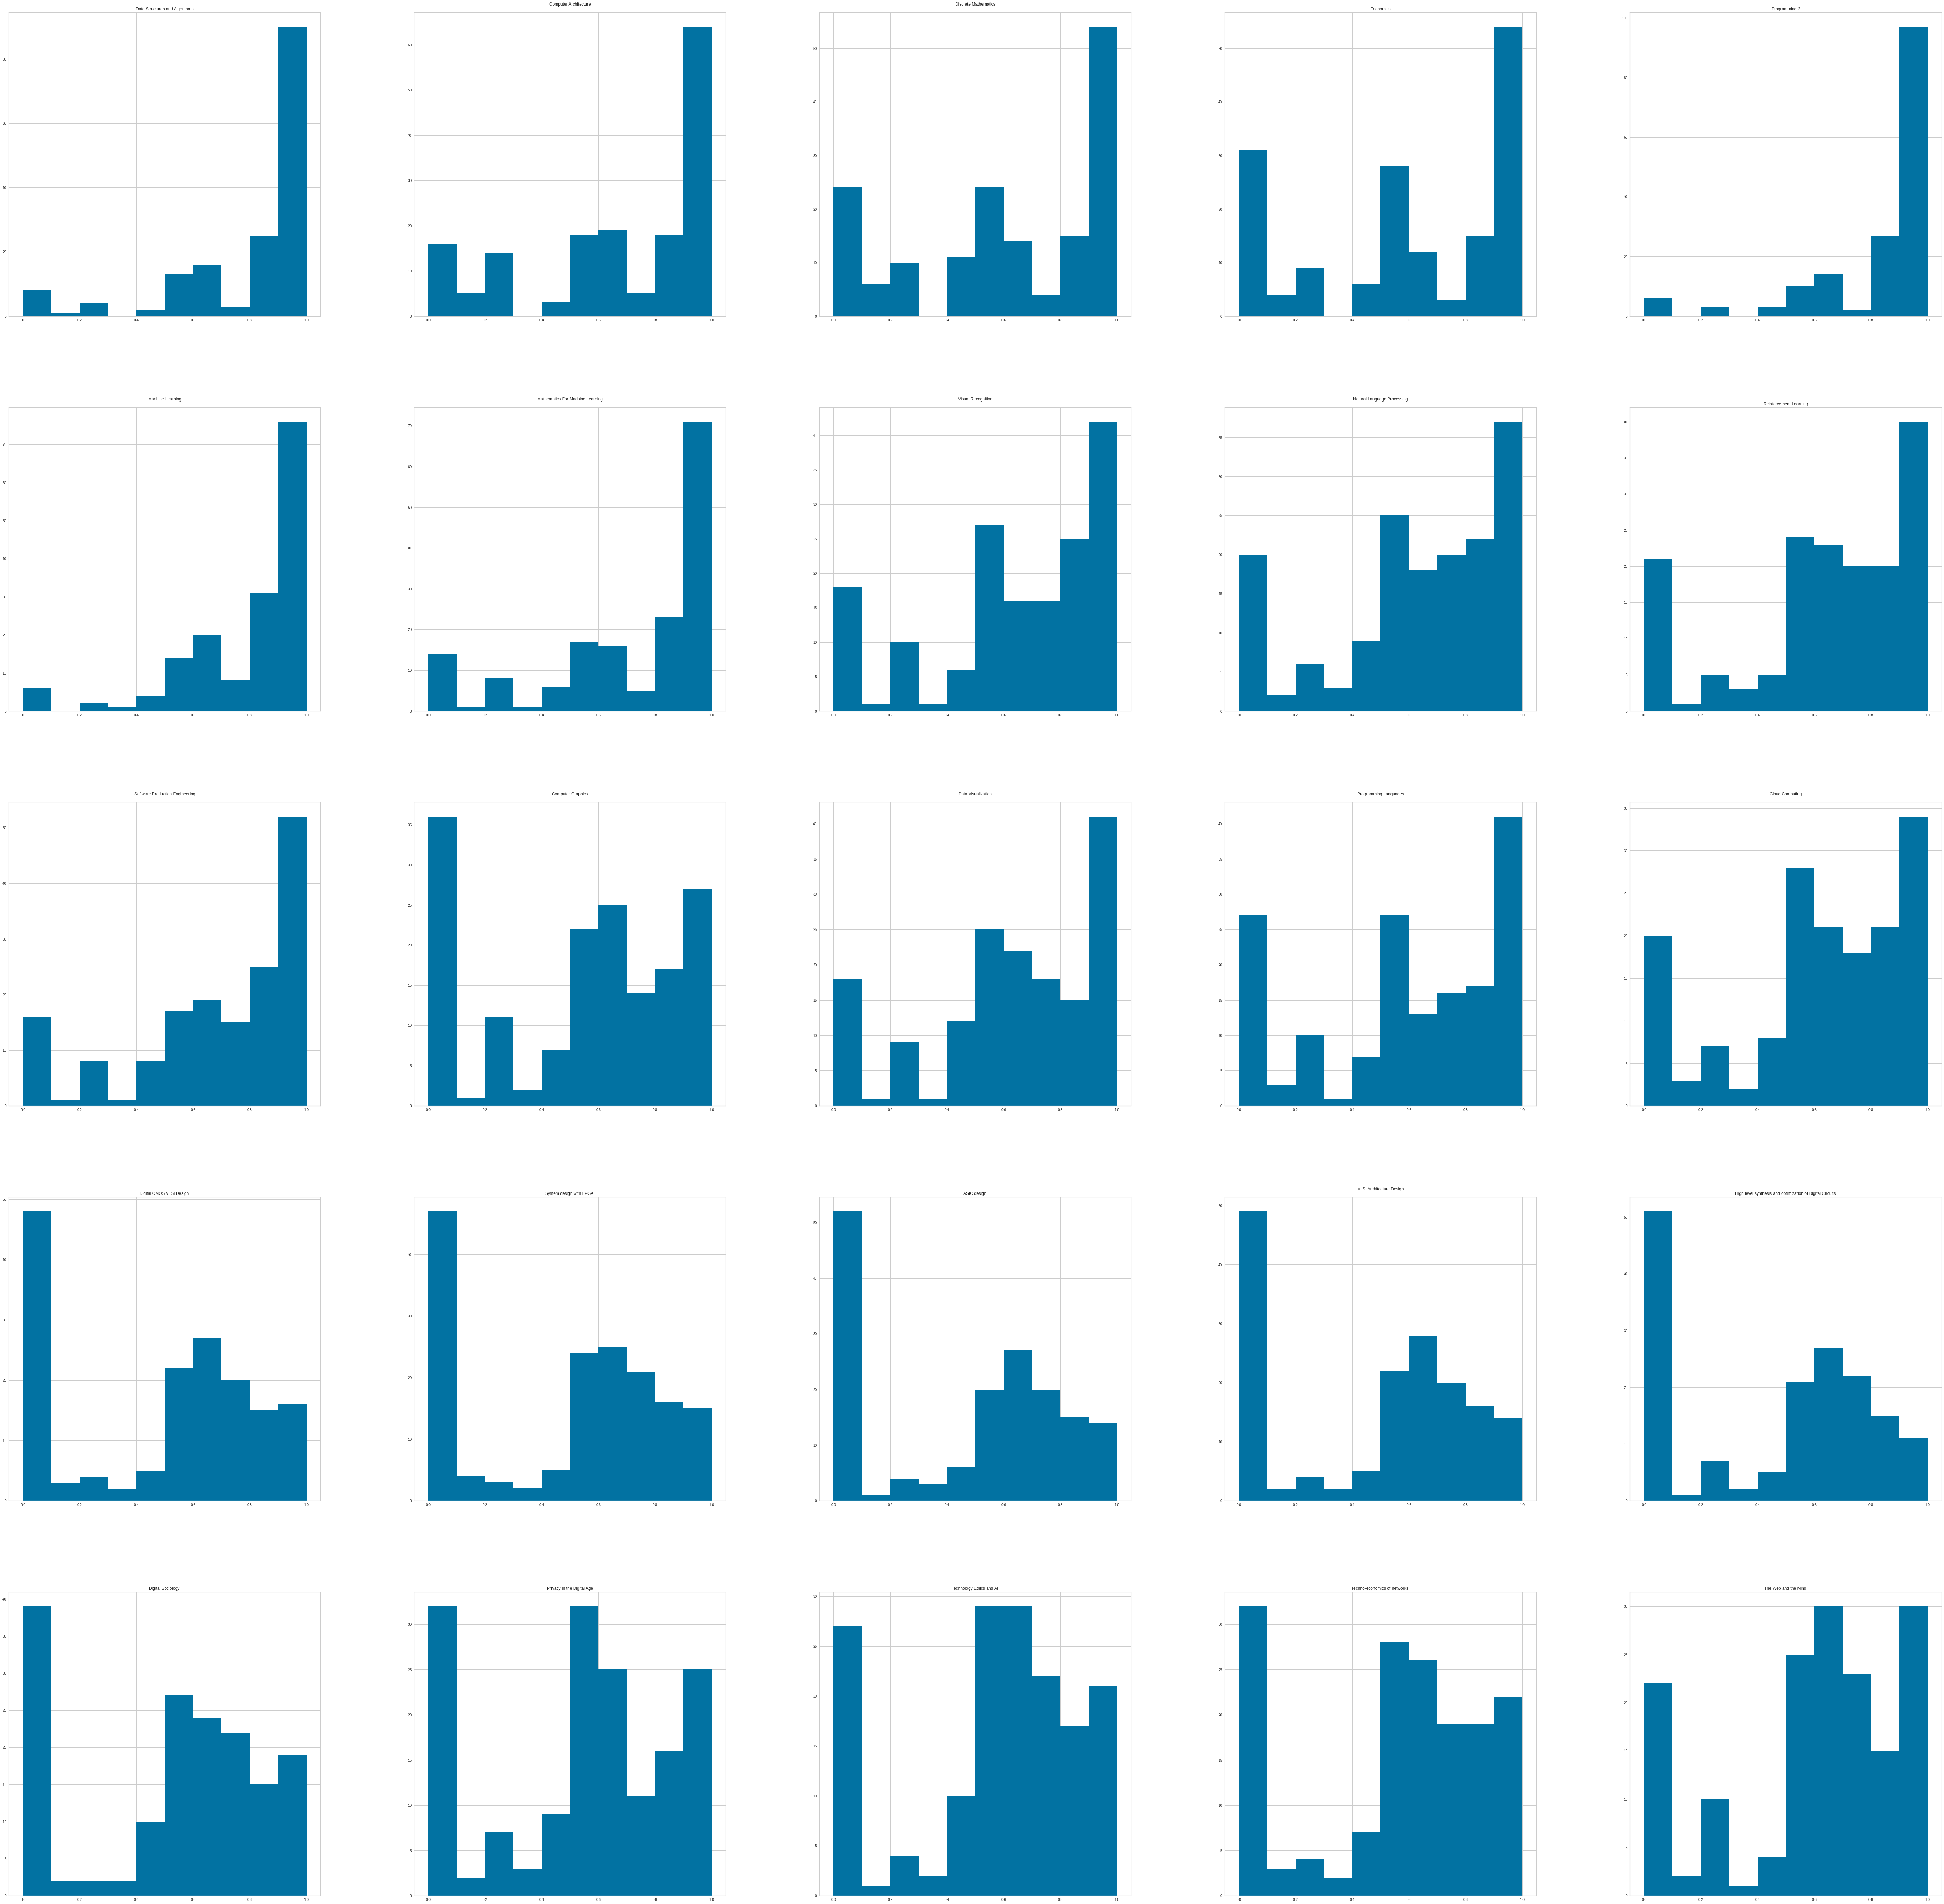

In [446]:
main_df.hist(figsize=(100,100))
plt.show()


In [447]:
main_df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.71,0.71,0.71,...,0.71,0.71,0.71,0.71,0.71,0.71,0.60,0.71,0.71,0.71
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.54,0.54,...,0.54,0.54,0.54,0.54,0.54,0.54,0.50,0.54,0.54,0.54
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.90,1.00,...,0.59,0.59,0.59,0.59,0.59,0.59,0.40,0.59,0.59,0.59
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.62,0.62,...,0.62,0.62,0.62,0.62,0.62,0.80,0.62,0.62,0.80,0.62
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.40,0.20,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,0.43,0.43,...,0.43,0.43,0.43,0.43,0.43,0.43,0.00,0.43,0.43,0.43
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,0.39,0.39,...,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.20
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.40,0.20,...,0.64,0.64,0.64,0.64,0.64,0.64,1.00,0.64,0.64,1.00
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.57,0.57,0.70,...,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57


In [448]:
# def min_max_scaler(row):
#     return (row - row.min()) / (row.max() - row.min())

# main_df = main_df.apply(lambda row: min_max_scaler(row), axis=1)

In [449]:
# from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
# # # create a RobustScaler object
# scaler = RobustScaler()
# # # main_df = main_df.T
# # # fit and transform the DataFrame using the scaler
# # main_df = pd.DataFrame(scaler.fit_transform(main_df), columns=main_df.columns)
# # # main_df = main_df.T

# # main_df=pd.DataFrame(scaler.fit_transform(main_df.T).T,columns=main_df.columns)
# scaled_df = main_df.apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten(), axis=1, result_type='expand')

# # add the original column names to the scaled DataFrame
# scaled_df.columns = main_df.columns
# main_df=scaled_df

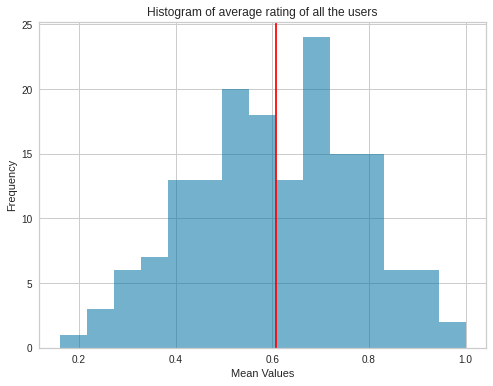

In [450]:
fig = plt.figure(figsize=(8, 6))
plt.hist(mean_val,bins=15,alpha=0.55)
plt.axvline(x=all_mean, color='red')
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of average rating of all the users')
plt.show()

In [451]:
main_df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.71,0.71,0.71,...,0.71,0.71,0.71,0.71,0.71,0.71,0.60,0.71,0.71,0.71
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.54,0.54,...,0.54,0.54,0.54,0.54,0.54,0.54,0.50,0.54,0.54,0.54
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.90,1.00,...,0.59,0.59,0.59,0.59,0.59,0.59,0.40,0.59,0.59,0.59
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.62,0.62,...,0.62,0.62,0.62,0.62,0.62,0.80,0.62,0.62,0.80,0.62
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.40,0.20,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,0.43,0.43,...,0.43,0.43,0.43,0.43,0.43,0.43,0.00,0.43,0.43,0.43
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,0.39,0.39,...,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.20
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.40,0.20,...,0.64,0.64,0.64,0.64,0.64,0.64,1.00,0.64,0.64,1.00
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.57,0.57,0.70,...,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57


In [452]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_df.iloc[:,:5], main_df.iloc[:,5:], test_size=0.2, random_state=420)

In [453]:
#params
num_clusters = 6

# K means

In [454]:
class KMeansClustering:
    def __init__(self, X, n_clusters):
        self.K = n_clusters # number of clusters 
        self.max_iter = 100 # max iteration. Preventing inf running time
        self.num_ex, self.num_features = X.shape # number of rows, number of features
        self.centroids = []
        
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) 
        for k in range(self.K): 
            centroid = X[np.random.choice(range(self.num_ex))]# random centroids
            centroids[k] = centroid
        return centroids 
    
    
    def print_cluster_numbers(self, clusters, X):
        y = np.zeros(self.num_ex) 
        for cltr_idx, cltr in enumerate(clusters):
            for sample_idx in cltr:
                y[sample_idx] = cltr_idx
        return y

    def update_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) 
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) 
            centroids[idx] = new_centroid
        return centroids

    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            centroid_closest = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis=1))) 
            clusters[centroid_closest].append(point_idx)
        return clusters 

    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iter):
            clusters = self.create_cluster(X, centroids) # create cluster
            prev_centroids = centroids
            centroids = self.update_centroids(clusters, X) # calculate new centroids
            self.centroids = centroids
            diff = centroids - prev_centroids # calculate difference
            if not diff.any():
                break
        print(clusters)
        y_pred = self.print_cluster_numbers(clusters, X) # print clusters with their respective points

        return y_pred

    def classify(self,pt):
        distances = [np.linalg.norm(pt-centroid) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def newclassify(self,pt,y_clusters):
        distances = [np.linalg.norm(pt-centroid) for centroid in self.centroids]
        y = np.zeros(20)
        sum = 0.0
        for i in range(len(distances)):
          y += y_clusters[i]*math.exp(1/distances[i])
          sum += math.exp(1/distances[i])
        # print(y/sum)
        return y/sum  


In [455]:
kmeans = KMeansClustering(X_train.values,num_clusters)
cluster1 = kmeans.fit(X_train.values)
# print(cluster1)

[[8, 9, 16, 18, 26, 33, 51, 57, 65, 69, 73, 95, 96, 108, 116, 119, 128], [1, 2, 5, 6, 19, 20, 21, 22, 24, 25, 28, 31, 37, 39, 40, 42, 43, 44, 45, 47, 53, 55, 56, 58, 59, 60, 61, 62, 67, 70, 72, 78, 79, 80, 86, 87, 88, 89, 90, 91, 92, 100, 104, 106, 112, 114, 125], [11, 36, 52, 66, 81, 84, 94], [7, 17, 35, 46, 77, 105, 110, 126], [4, 12, 14, 23, 29, 30, 32, 49, 50, 85, 93, 97, 98, 102, 103, 107, 109, 115, 120, 121, 122], [0, 3, 10, 13, 15, 27, 34, 38, 41, 48, 54, 63, 64, 68, 71, 74, 75, 76, 82, 83, 99, 101, 111, 113, 117, 118, 123, 124, 127]]


In [456]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto").fit(X_train.values)
# cluster1 = kmeans.predict(X_train.values)

In [457]:
cluster1 = np.array(cluster1)
cluster1.shape

(129,)

In [458]:
cluster1

array([5., 1., 1., 5., 4., 1., 1., 3., 0., 0., 5., 2., 4., 5., 4., 5., 0.,
       3., 0., 1., 1., 1., 1., 4., 1., 1., 0., 5., 1., 4., 4., 1., 4., 0.,
       5., 3., 2., 1., 5., 1., 1., 5., 1., 1., 1., 1., 3., 1., 5., 4., 4.,
       0., 2., 1., 5., 1., 1., 0., 1., 1., 1., 1., 1., 5., 5., 0., 2., 1.,
       5., 0., 1., 5., 1., 0., 5., 5., 5., 3., 1., 1., 1., 2., 5., 5., 2.,
       4., 1., 1., 1., 1., 1., 1., 1., 4., 2., 0., 0., 4., 4., 5., 1., 5.,
       4., 4., 1., 3., 1., 4., 0., 4., 3., 5., 1., 5., 1., 4., 0., 5., 5.,
       0., 4., 4., 4., 5., 5., 1., 3., 5., 0.])

In [459]:
train_df = pd.concat([X_train, y_train], axis=1)
X_filled = train_df.fillna(train_df.mean())

cluster_means = []
for k in range(num_clusters):
    cluster_samples = X_filled[cluster1 == k]
    cluster_means.append(cluster_samples.mean())

cluster_means = pd.concat(cluster_means, axis=1).transpose()

# Elbow method to find optimal K

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

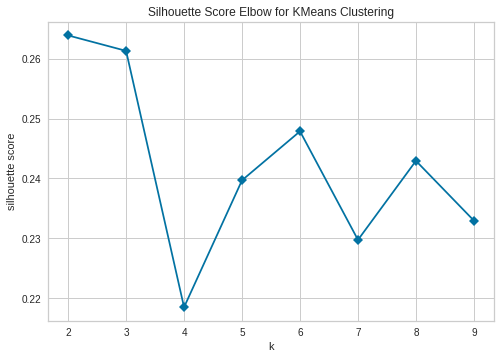

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [460]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans as KMeansSKLearn

elbow = KMeansSKLearn(random_state=0)

plot = KElbowVisualizer(elbow, k=(2,10), metric='silhouette', timings=False, locate_elbow=False)

plot.fit(X_train.values)    
plot.poof()

In [461]:
svd_data = cluster_means
svd_data

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.885294,0.882353,0.129412,0.673529,0.867647,0.840000,0.634118,0.751765,0.592941,0.610588,...,0.532941,0.503529,0.503529,0.485882,0.422941,0.533529,0.565294,0.593529,0.587059,0.554118
1,0.827582,0.839787,0.799412,0.863671,0.860168,0.792608,0.796863,0.732821,0.652948,0.678352,...,0.585319,0.599787,0.601489,0.588936,0.591915,0.701489,0.665993,0.737021,0.741277,0.697234
2,0.142857,0.757143,0.128571,0.942857,0.628571,0.657143,0.442857,0.385714,0.420000,0.618571,...,0.290000,0.290000,0.290000,0.290000,0.290000,0.432857,0.487143,0.504286,0.548571,0.720000
3,0.887500,0.240000,0.793750,0.893750,0.862500,0.655000,0.580000,0.563750,0.480000,0.426250,...,0.418750,0.406250,0.443750,0.406250,0.418750,0.606250,0.742500,0.668750,0.735000,0.676250
4,0.907143,0.883333,0.875714,0.271429,0.859524,0.822381,0.762857,0.642857,0.688571,0.663810,...,0.540952,0.568095,0.515714,0.553810,0.496667,0.470476,0.510476,0.445714,0.460952,0.596667
5,0.753448,0.213793,0.324138,0.322414,0.841379,0.778621,0.637931,0.516552,0.548966,0.551379,...,0.310345,0.263793,0.256897,0.310345,0.279310,0.403448,0.409655,0.429310,0.357241,0.509310


# SVD

In [462]:
def eigen_decomp(A, eps=1e-10, maxiter=1000):
    n, _ = A.shape
    V = np.random.randn(n, n) # -> getting the matrix V 

    for i in range(maxiter): # -> using the power iterations might have to increase the maxiter if need better results
        AV = A.dot(V)
        V_, _ = np.linalg.qr(AV)
        if np.allclose(V, V_, rtol=eps):
            break
        V = V_

    eigens = np.diag(V.T.dot(A.dot(V)))
    return eigens, V
def svd(A):
    m, n = A.shape

    C = A.T.dot(A)

    eigens, V = eigen_decomp(C)

    idx = eigens.argsort()[::-1]
    eigens = eigens[idx]
    V = V[:,idx]

    signular_values = np.sqrt(eigens)
    U = A.dot(V) / signular_values

    return U, signular_values, V.T

# u,s,v = svd(svd_data.T)
u,s,v = np.linalg.svd(svd_data)

# Finding optimal number of singular values to keep

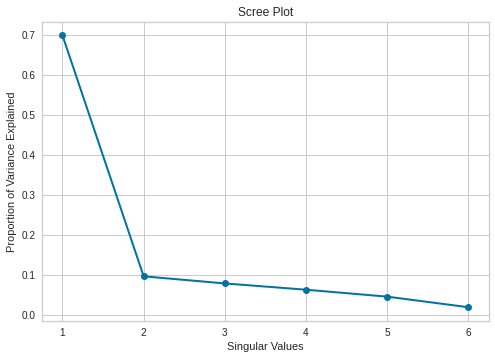

In [463]:
# Compute singular values
singular_values = s*2 / np.sum(s*2)

# Compute cumulative energy
cumulative_energy = np.cumsum(singular_values)

# Generate scree plot
plt.plot(range(1, len(singular_values) + 1), singular_values, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Singular Values')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [464]:
print(u.shape,s.shape,v.shape)

(6, 6) (6,) (25, 25)


In [465]:
s_original = np.zeros(u.shape)
s_diag = np.pad(s, (0, s_original.shape[0] - s.shape[0]), 'constant', constant_values=(0, 0))

In [466]:
np.fill_diagonal(s_original, s_diag)
if s_original.shape[1] < v.shape[0]:
  z = np.zeros((s_original.shape[0], v.shape[0] - s_original.shape[1]))
  s_original = np.append(s_original, z, axis=1)
s_original

array([[7.26851833, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99850931, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.81377408, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [467]:
print(u.shape,s_original.shape,v.shape)

(6, 6) (6, 25) (25, 25)


# Truncated SVD

In [468]:
s_trunkated = np.zeros((s.shape[0], s.shape[0]))
v = v[:s.shape[0],:]
for i in range(0,len(s)):
  s_trunkated[i][i] = s_original[i][i]

In [469]:
u_trunkated = u[:, :s.shape[0]]
print(u_trunkated.shape,s_trunkated.shape,v.shape)
# predicted = u_trunkated@s_trunkated@v
# predicted[train_size]


(6, 6) (6, 6) (6, 25)


# Reduced SVD


In [470]:
reduced = 4 #number of singular values to keep
u_reduced = u[:, :reduced]

In [471]:
s_reduced = np.zeros((reduced, reduced))
for i in range(0, reduced):
  s_reduced[i][i] = s_trunkated[i][i]
s_reduced

array([[7.26851833, 0.        , 0.        , 0.        ],
       [0.        , 0.99850931, 0.        , 0.        ],
       [0.        , 0.        , 0.81377408, 0.        ],
       [0.        , 0.        , 0.        , 0.65051543]])

In [472]:
v_reduced = v[:reduced, :]

In [473]:
pred = u_reduced@s_reduced@v_reduced

In [474]:
pred_labels = pred[:,5:]

In [475]:
test_pred_labels = pred_labels

In [476]:
test_pred_labels

array([[0.88669904, 0.69365713, 0.66758348, 0.6356305 , 0.70671159,
        0.73455222, 0.51252108, 0.65104721, 0.61553494, 0.63526875,
        0.47656782, 0.45692377, 0.438995  , 0.46066638, 0.41105465,
        0.50939217, 0.52245344, 0.55117761, 0.52985873, 0.64395568],
       [0.82356773, 0.76058038, 0.70703191, 0.65539937, 0.67808056,
        0.77566026, 0.60503408, 0.7677277 , 0.6261773 , 0.6587549 ,
        0.57581775, 0.59400884, 0.58852357, 0.57538143, 0.56239114,
        0.66119694, 0.70577563, 0.69651508, 0.74076643, 0.75185189],
       [0.62059599, 0.42350583, 0.44079832, 0.39588776, 0.56636107,
        0.63522716, 0.29632549, 0.5612514 , 0.4602292 , 0.42598477,
        0.32409407, 0.31743979, 0.32978104, 0.30859668, 0.30708613,
        0.4604826 , 0.49614846, 0.54189998, 0.57988183, 0.65146982],
       [0.65300526, 0.61125472, 0.55395223, 0.48970934, 0.45069662,
        0.72100238, 0.52926288, 0.59001456, 0.49964012, 0.57680188,
        0.40872285, 0.39703373, 0.43320319, 0

# Graph indicating number of courses appearing in the top for of cluster

In [477]:
def get_top_n_recomendations(dataset, n):
  sorted = np.argsort(dataset, axis=1)
  return np.flip(sorted, axis=1)[:,:n]

In [478]:
result = get_top_n_recomendations(test_pred_labels,5)
result

array([[ 0,  5,  4,  1,  2],
       [ 0,  5,  7,  1, 19],
       [19,  5,  0, 18,  4],
       [ 5, 18, 16, 17, 19],
       [ 0,  1,  2,  3,  7],
       [ 0,  5,  1,  9,  2]])

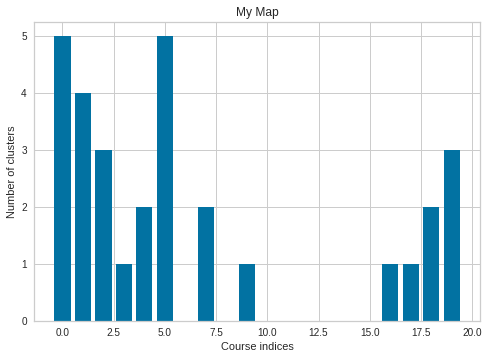

{0: 5, 5: 5, 4: 2, 1: 4, 2: 3, 7: 2, 19: 3, 18: 2, 16: 1, 17: 1, 3: 1, 9: 1}

In [497]:
data = result
map = {}
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
      # map[data[i][j]]+=1
    if data[i][j] in map:
      map[data[i][j]]+= 1
    else:
      map[data[i][j]] = 1

plt.bar(map.keys(), map.values())

# set the axis labels and title
plt.xlabel('Course indices')
plt.ylabel('Number of clusters')
plt.title('My Map')

# show the plot
plt.show()
map

# Train and test Accuracy (top 5)

In [480]:
def getAcc(prediction,true_label):
  sum = 0;
  for x in prediction:
    if x in true_label:
      sum = sum + 1
  return sum/len(prediction)


In [481]:
def train_acc(dataframe,test_pred_labels,cluster):
  prediction = get_top_n_recomendations(test_pred_labels,5)
  actual = get_top_n_recomendations(np.array(dataframe.iloc[:,5:]),5)
  sum = 0
  for i in range(len(actual)):
    sum = sum + getAcc(prediction[int(cluster[i])],actual[i])
    # print(getAcc(prediction[int(cluster[i])],actual[i]),int(cluster[i]),prediction[int(cluster[i])],actual[i])
  return sum/len(actual)

In [482]:
train_acc(train_df,test_pred_labels,cluster1)

0.46821705426356575

In [483]:
main_df.columns[0+5]

'Machine Learning\n'

In [484]:
kmeans.classify(np.array([1,2,3,4,5]))

1

In [485]:
np.array(X_test.iloc[0:1,:])

array([[0.7, 0.8, 0.4, 0.4, 0.9]])

In [486]:
def test_acc_orig(X_test,y_test,test_pred_labels):
  sum = 0
  prediction = get_top_n_recomendations(test_pred_labels,5)
  for i in range(len(X_test)):
    cluster = kmeans.classify(np.array(X_test.iloc[i:i+1,:]))
    actual = get_top_n_recomendations(np.array(y_test.iloc[i:i+1,:]),5)
    # print(prediction[cluster],y_test.iloc[i:i,:])
    sum = sum + getAcc(prediction[int(cluster)],actual)
  return sum/len(X_test)

In [487]:
test_acc_orig(X_test,y_test,test_pred_labels)

0.4909090909090909

# Test accuracy using kmeans v2 (Novelty - weighted sum of ratings of all clusters explained in slides )

In [488]:
def test_acc(X_test,y_test,test_pred_labels):
  sum = 0
  prediction = get_top_n_recomendations(test_pred_labels,5)
  for i in range(len(X_test)):
    new_pred = get_top_n_recomendations([kmeans.newclassify(np.array(X_test.iloc[i:i+1,:]),test_pred_labels)],5)
    # cluster = kmeans.classify(np.array(X_test.iloc[i:i+1,:]))
    actual = get_top_n_recomendations(np.array(y_test.iloc[i:i+1,:]),5)
    # print(prediction[cluster],y_test.iloc[i:i,:])
    sum = sum + getAcc(new_pred,actual)
  return sum/len(X_test)

In [489]:
test_acc(X_test,y_test,test_pred_labels)

0.7575757575757576

#Real time inference

In [490]:
main_df.columns

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [491]:
get_top_n_recomendations(test_pred_labels,5)

array([[ 0,  5,  4,  1,  2],
       [ 0,  5,  7,  1, 19],
       [19,  5,  0, 18,  4],
       [ 5, 18, 16, 17, 19],
       [ 0,  1,  2,  3,  7],
       [ 0,  5,  1,  9,  2]])

In [492]:
input = np.array([0,0,0,0,0])
cluster_number = kmeans.classify(input)
Top_for_all_clusters = get_top_n_recomendations(test_pred_labels,20)
print(cluster_number)
for x in range(20):
  print(main_df.columns[Top_for_all_clusters[cluster_number][x]+5])

5
Machine Learning

Software Production Engineering

Mathematics For Machine Learning

Cloud Computing

Visual Recognition

Natural Language Processing

Programming Languages

Reinforcement Learning
The Web and the Mind 
Computer Graphics

Data Visualization

Privacy in the Digital Age
Technology Ethics and AI 
Digital Sociology 
Techno-economics of networks 
Digital CMOS VLSI Design 
VLSI Architecture Design

ASIC design 
System design with FPGA 
High level synthesis and optimization of Digital Circuits 


In [493]:
input = np.array([0,0,0,0,0])
cluster_number = kmeans.newclassify(input,test_pred_labels)
new_pred = get_top_n_recomendations([cluster_number],20)
print(new_pred[0])
for x in range(20):
  print(main_df.columns[new_pred[0][x]+5])

[ 0  5  1 19  7  2  4  9 18 17 16  3  8 15  6 10 13 11 12 14]
Machine Learning

Software Production Engineering

Mathematics For Machine Learning

The Web and the Mind 
Data Visualization

Visual Recognition

Reinforcement Learning
Cloud Computing

Techno-economics of networks 
Technology Ethics and AI 
Privacy in the Digital Age
Natural Language Processing

Programming Languages

Digital Sociology 
Computer Graphics

Digital CMOS VLSI Design 
VLSI Architecture Design

System design with FPGA 
ASIC design 
High level synthesis and optimization of Digital Circuits 


In [494]:
input = np.array([1,1,1,1,1])
cluster_number = kmeans.newclassify(input,test_pred_labels)
new_pred = get_top_n_recomendations([cluster_number],20)
print(new_pred[0])
for x in range(20):
  print(main_df.columns[new_pred[0][x]+5])

[ 0  5  1  7 19  2 18 16  4 17  9  3 15  8  6 11 12 10 13 14]
Machine Learning

Software Production Engineering

Mathematics For Machine Learning

Data Visualization

The Web and the Mind 
Visual Recognition

Techno-economics of networks 
Privacy in the Digital Age
Reinforcement Learning
Technology Ethics and AI 
Cloud Computing

Natural Language Processing

Digital Sociology 
Programming Languages

Computer Graphics

System design with FPGA 
ASIC design 
Digital CMOS VLSI Design 
VLSI Architecture Design

High level synthesis and optimization of Digital Circuits 


In [495]:
input = np.array([0.5,0.5,0.5,0.5,0.5])
cluster_number = kmeans.newclassify(input,test_pred_labels)
new_pred = get_top_n_recomendations([cluster_number],20)
print(new_pred[0])
for x in range(20):
  print(main_df.columns[new_pred[0][x]+5])

[ 0  5  1 19  7  2  4  9 18  3 17 16  8 15  6 10 13 11 12 14]
Machine Learning

Software Production Engineering

Mathematics For Machine Learning

The Web and the Mind 
Data Visualization

Visual Recognition

Reinforcement Learning
Cloud Computing

Techno-economics of networks 
Natural Language Processing

Technology Ethics and AI 
Privacy in the Digital Age
Programming Languages

Digital Sociology 
Computer Graphics

Digital CMOS VLSI Design 
VLSI Architecture Design

System design with FPGA 
ASIC design 
High level synthesis and optimization of Digital Circuits 
